In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
yelp = pd.read_excel("file:///C:/Users/Archit%20Jhingan/Downloads/Reviews/Train/reviews.xlsx", encoding='UTF-8', error_bad_lines=False)

In [84]:
yelp.shape

(585, 2)

In [85]:
yelp.head()

,Reviews,Sentiment
0,"बुरा बुरा बुरा सबसे खराब मूवी ,सबसे खराब साजिश...",Negative
1,यह बहुत खराब है और अन्य कार्यक्रमों के साथ काम...,Negative
2,"सुस्त, सुस्त, सुस्त #",Negative
3,"निर्माण में घटिया, बहुत बुरा गुणवत्ता के चमड़े,...",Negative
4,"एक खराब कल्पना, खराब गड़बड़ एक साथ रखा हैं ...",Negative


In [86]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 2 columns):
Reviews      585 non-null object
Sentiment    585 non-null object
dtypes: object(2)
memory usage: 9.2+ KB


In [87]:
yelp['text length'] = yelp['Reviews'].apply(len)
yelp.head()

,Reviews,Sentiment,text length
0,"बुरा बुरा बुरा सबसे खराब मूवी ,सबसे खराब साजिश...",Negative,124
1,यह बहुत खराब है और अन्य कार्यक्रमों के साथ काम...,Negative,77
2,"सुस्त, सुस्त, सुस्त #",Negative,29
3,"निर्माण में घटिया, बहुत बुरा गुणवत्ता के चमड़े,...",Negative,73
4,"एक खराब कल्पना, खराब गड़बड़ एक साथ रखा हैं ...",Negative,51


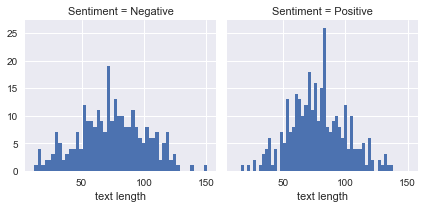

In [88]:
g = sns.FacetGrid(data=yelp, col='Sentiment')
g.map(plt.hist, 'text length', bins=50)
plt.show()

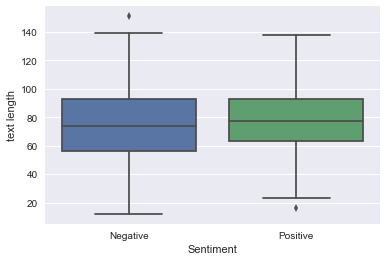

In [89]:
sns.boxplot(x='Sentiment', y='text length', data=yelp)

In [90]:
X = yelp['Reviews']
y = yelp['Sentiment']

In [91]:
X[0]

'बुरा बुरा बुरा सबसे खराब मूवी ,सबसे खराब साजिश सबसे खराब अभिनेता सबसे खराब गीत कुछ भी नहीं इसके बारे में अच्छा था      #    '

In [158]:
sword = pd.read_excel('stopwords.xlsx', encoding='UTF-8', error_bad_lines=False)
stop = sword['Stopwords'].str.split()
stop

0    [के, का, एक, में, की, है, यह, और, से, हैं, को,...
Name: Stopwords, dtype: object

In [164]:
swords = open('stopwords.txt','r',encoding="utf8").read()
swords

'\ufeffके\nका\nएक\nमें\nकी\nहै\nयह\nऔर\nसे\nहैं\nको\nपर\nइस\nहोता\nकि\nजो\nकर\nमे\nगया\nकरने\nकिया\nलिये\nअपने\nने\nबनी\nतो\nही\nया\nएवं\nदिया\nहो\nइसका\nथा\nद्वारा\nहुआ\nतक\nसाथ\nकरना\nवाले\nबाद\nलिए\nआप\nकुछ\nसकते\nकिसी\nये\nइसके\nसबसे\nइसमें\nथे\nदो\nहोने\nवह\nवे\nकरते\nबहुत\nकहा\nवर्ग\nकई\nकरें\nहोती\nअपनी\nउनके\nथी\nयदि\nहुई\nजा\nना\nइसे\nकहते\nजब\nहोते\nकोई\nहुए\nव\nन\nअभी\nजैसे\nसभी\nकरता\nउनकी\nतरह\nउस\nआदि\nकुल\nएस\nरहा\nइसकी\nसकता\nरहे\nउनका\nइसी\nरखें\nअपना\nपे\nउसके\n'

In [162]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word not in swords]

In [163]:
sample_text = "बुरा बुरा बुरा सबसे खराब मूवी ,सबसे खराब साजिश सबसे खराब अभिनेता सबसे खराब गीत कुछ भी नहीं इसके बारे में अच्छा था"
print(text_process(sample_text))

['बुरा', 'बुरा', 'बुरा', 'खराब', 'मूवी', 'खराब', 'साजिश', 'खराब', 'अभिनेता', 'खराब', 'गीत', 'भी', 'नहीं', 'बारे', 'अच्छा']


In [96]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
len(bow_transformer.vocabulary_)

1672

In [97]:
X = bow_transformer.transform(X)

In [99]:
Negative = data[data['Sentiment'] == 'Negative']
Positive = data[data['Sentiment'] == 'Positive']from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [100]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
preds = nb.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[67 17]
 [ 7 85]]


             precision    recall  f1-score   support

   Negative       0.91      0.80      0.85        84
   Positive       0.83      0.92      0.88        92

avg / total       0.87      0.86      0.86       176



In [103]:
from sklearn.linear_model import LogisticRegression
logistic =  LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
lpreds = logistic.predict(X_test)

In [105]:
print(confusion_matrix(y_test, lpreds))
print('\n')
print(classification_report(y_test, lpreds))

[[69 15]
 [ 9 83]]


             precision    recall  f1-score   support

   Negative       0.88      0.82      0.85        84
   Positive       0.85      0.90      0.87        92

avg / total       0.86      0.86      0.86       176



In [114]:
review = "यह एक किताब नहीं है"

In [115]:
review_transformed = bow_transformer.transform([review])
nb.predict(review_transformed)[0]


'Negative'